# Quantitative Variable Descriptive Analytics and Probability

## Package Imports

We'll import three Python packages that we've used so far and will need for this assignment.  Those packages are pandas, matplotlib.pyplot, and seaborn.  

Run the cell provided below to access the functions in these packages.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<hr>

## <u>Case Study</u>: Groundhog Day

On Groundhog Day (February 2), a famous groundhog in Pennsylvania called Punxsutawney Phil emerges from his burrow.  Spectators watch and observe whether he sees his shadow or not.  The legend says that if he sees his shadow, winter will continue for six more weeks; if not, spring is coming early.  In 2023, Phil saw his shadow.  But, does the data support the legend?  In this Case Study, we'll examine historical data to see what the data supports.

## 1. Read in the Data 

Read in the groundhog.csv data.  Check the data for missing data, make any necessary adjustments, and print the first few rows of the data frame.

In [2]:
df = pd.read_csv('groundhog.csv')

In [3]:
df.dtypes

Year                                             int64
Phil                                            object
February Average Temperature                   float64
February Average Temperature (Northeast)       float64
February Average Temperature (Midwest)         float64
February Average Temperature (Pennsylvania)    float64
March Average Temperature                      float64
March Average Temperature (Northeast)          float64
March Average Temperature (Midwest)            float64
March Average Temperature (Pennsylvania)       float64
dtype: object

In [4]:
df.isnull().sum()

Year                                           0
Phil                                           0
February Average Temperature                   0
February Average Temperature (Northeast)       0
February Average Temperature (Midwest)         0
February Average Temperature (Pennsylvania)    0
March Average Temperature                      0
March Average Temperature (Northeast)          0
March Average Temperature (Midwest)            0
March Average Temperature (Pennsylvania)       0
dtype: int64

In [5]:
df['Phil'].unique()

array(['No Record', 'Full Shadow', 'No Shadow', 'Partial Shadow'],
      dtype=object)

In [6]:
missing_values = ['No Record']
df = pd.read_csv('groundhog.csv', na_values=missing_values)
df = df.dropna().reset_index(drop = True)

In [7]:
df.head()

,Year,Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1898,Full Shadow,35.37,24.8,33.3,26.7,41.05,38.0,46.0,42.0
1,1900,Full Shadow,30.76,21.4,27.5,24.1,41.27,26.0,37.9,29.3
2,1901,Full Shadow,29.86,16.0,26.2,18.9,40.71,30.8,41.9,35.1
3,1903,Full Shadow,28.42,24.5,31.3,28.0,42.21,40.4,47.7,44.5
4,1904,Full Shadow,31.59,15.0,28.2,19.2,41.76,29.8,42.8,34.0


## 2. Phil's Outcomes 

For this problem, we will explore the results of Phil's experiment by focusing on the variable Phil. 

**a)** First, what is the sample space of possible outcomes for Phil's experiment?

In [8]:
df['Phil'].unique()

array(['Full Shadow', 'No Shadow', 'Partial Shadow'], dtype=object)

{'Full Shadow', 'No Shadow', 'Partial Shadow'}

**b)** Then, we'd like to summarize the observed outcomes for this experiment from the data.  Calculate the relative frequencies for each of the possible results when Phil emerges from his burrow.

In [9]:
df['Phil'].value_counts(normalize=True)

Full Shadow       0.862069
No Shadow         0.129310
Partial Shadow    0.008621
Name: Phil, dtype: float64

**c)** Which result is most common?  Least common?

Based on these results, choose whether you'd like to filter your data to remove uncommon outcomes.  Explain your decision.

'Full Shadow' is the most observed result and 'Partial Shadow' is the least common result. 

I would like to remove the row that the observed outcome of Phil is 'Partial Shadow', because the portion of it is too small to see that it is a normal observation. 

In [10]:
df = df[df['Phil'] != 'Partial Shadow']

## 3. Midwest Temperatures

Because we live in the Midwest, we'd like to observe whether Phil's prediction about winter seems to be accurate, based on the average temperatures recorded in the Midwest.  The following steps will help you gather information to answer this question.

**a)** Generate side-by-side violin plots to display the average temperature in February for the Midwest, based on the result of Punxsutawney Phil's shadow.

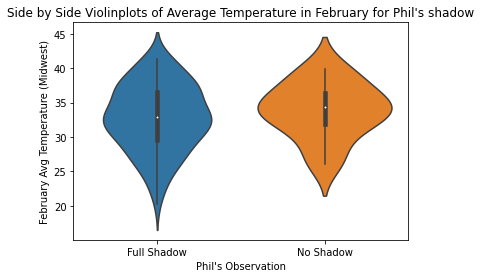

In [11]:
sns.violinplot(x='Phil', y='February Average Temperature (Midwest)', data=df) 
plt.xlabel("Phil's Observation") 
plt.ylabel('February Avg Temperature (Midwest)') 
plt.title("Side by Side Violinplots of Average Temperature in February for Phil's shadow") 
plt.show() 

**b)** For each of the results of Phil's experiment, calculate one measure of center and one measure of spread.

In [12]:
df['February Average Temperature (Midwest)'].loc[df['Phil'] == 'Full Shadow'].mean()

32.799

In [13]:
df['February Average Temperature (Midwest)'].loc[df['Phil'] == 'No Shadow'].mean()

33.85333333333333

In [14]:
df['February Average Temperature (Midwest)'].loc[df['Phil'] == 'Full Shadow'].std()

4.807664230531845

In [15]:
df['February Average Temperature (Midwest)'].loc[df['Phil'] == 'No Shadow'].std()

3.9879938864164823

**c)** We've already examined the February temperatures, but a friend thinks that how quickly winter comes may actually relate to how much the average temperatures increase between February and March.  Calculate a new variable for the increase in the average temperature in the Midwest from February to March, and include this variable in our data frame.

In [16]:
df['Increased Temperature'] = df['March Average Temperature (Midwest)'] - df['February Average Temperature (Midwest)']

**d)** Generate side-by-side boxplots for the temperature increase between February and March calculated in part **c**.

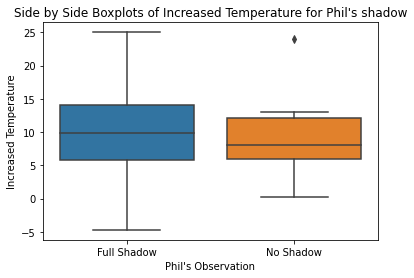

In [17]:
sns.boxplot(x='Phil', y='Increased Temperature', data=df) 
plt.xlabel("Phil's Observation") 
plt.ylabel('Increased Temperature') 
plt.title("Side by Side Boxplots of Increased Temperature for Phil's shadow") 
plt.show() 

**e)** Finally, we'll consider what all of this information means.  If you don't like the idea of winter being extended, would you want Phil to see his shadow on Groundhog Day?  Explain.

Thinking critically about our data, do you have any questions about the data?  Do you notice any limitations to results that you can draw from this data?

If I don't want winter to be extended, it would be better Phil not seeing his shadow on Groundhog Day. I think we should observe how much the average temperature had increased from February to March to decide whether winter has been really extended or not. According to the boxplot that I have plotted, the median and spread of increased temperature was lower when Phil have not seen his shadow. Therefore, I can expect that winter will end sooner when Phil doesn't see his shadow on Groundhog Day. 

Nevertheless, the data has a limitation to figure out if the winter will be extended for 6 weeks. Average temperature of each month does not exactly identifies the change of temperature during 6 weeks. The data analysis would be more reliable if there is a data of average temperature every week. 

<hr>

## <u>Case Study</u>: Poker Hand

In poker, a player is dealt 5 cards from a standard deck of 52 cards.  One type of hand that can be dealt is a three of a kind, where a player has three cards of the same rank (face), one card of a different rank, and the last card of a different rank from the other two.  Note that this is distinct from a full house, where we have three of a kind (three cards of the same rank) and a pair (two cards of the same rank).  

## 4. Actual Probability 
First, using our counting rules, calculate the actual probability if drawing a three of a kind poker hand.

**Show your work and calculations.**

In [18]:
# combination of drawing three of a kind poker hand
from math import factorial

# we must choose the rank which the player has three of them : 13
# choose three cards of that rank : 4 choose 3 (4 suits for each rank)
# then, choose the two different ranks : (13-1) choose 2
# choose one card for each rank : 4 * 4

three_of_a_kind = 13 * (factorial(4) / (factorial(3) * factorial(1))) * (factorial(12) / (factorial(2) * factorial(10))) * (4 * 4)
three_of_a_kind

54912.0

In [19]:
# combination of drawing 5 cards from a standard deck of 52 cards

n = 52 # total number of cards
k = 5 # number of dealt cards

total = factorial(n) / (factorial(k) * factorial(n-k))
total

2598960.0

In [20]:
probability = three_of_a_kind / total
probability

0.02112845138055222

The actual probability of drawing a three of a kind poker hand is about 0.0211. 

## 5. Probability Estimate

We have created two test hands below in the form of data frames.  

1. **hand1** is a 'three of a kind' hand
2. **hand2** is not a 'three of a kind' hand

In [21]:
import pandas as pd
hand1 = pd.DataFrame({'face': ['J','J','2','9','J'],
                           'suit': ['heart', 'club', 'spade', 'club', 'diamond']})
hand1

,face,suit
0,J,heart
1,J,club
2,2,spade
3,9,club
4,J,diamond


In [22]:
hand2 = pd.DataFrame({'face': ['J','J','Q','Q','J'],
                           'suit': ['heart', 'club', 'spade', 'club', 'diamond']})
hand2

,face,suit
0,J,heart
1,J,club
2,Q,spade
3,Q,club
4,J,diamond


In [23]:
a = hand2['face'].value_counts().shape[0]
a
b = hand2['face'].value_counts().max()
b

3

**a)** Create a function that returns True if a hand is a three of a kind and False if a hand is not three of a kind.

In [24]:
def tester(hand):
    if (hand['face'].value_counts().shape[0] == 3) and (hand['face'].value_counts().max() == 3):
        return True
    else:
        return False

**b)** Confirm this function works using **hand1** and **hand2**.

In [25]:
print(tester(hand1))
print(tester(hand2))

True
False


The function returns True for hand1 and False for hand2. 

**c)** Using the cards.csv file, conduct one trial that does the following:

1. Draws a poker hand.
2. Checks if the hand is three of a kind.

In [26]:
cards = pd.read_csv('cards.csv')
draw = cards.sample(5, replace = False, random_state= 3)
draw

,color,suit,face
12,black,club,K
40,red,heart,2
9,black,club,10
49,red,heart,J
39,red,heart,A


In [27]:
print(tester(draw))

False


**d)** Now, extend your work from part c to repeat this 20,000 times.

Specifically, for this simulation:

1. Simulate drawing 20,000 different hands of poker.  Each hand is randomly sampled without replacement.  You can assume after each trial the previous cards are returned to the deck, so that you have a fresh 52 card deck at the start of each trial.
2. Test whether the hand drawn is a three of a kind.
3. Calculate the proportion of trials that were a three of a kind.

**Warning: using print statements may cause your notebook to crash, depending on where the statements are located in your code.**

In [28]:
result = []

for i in range(20000):
    hand = cards.sample(5, replace= False)
    logical_value = tester(hand)
    result.append(logical_value)


In [29]:
c = {"Result": result}
df_three = pd.DataFrame(c)
df_three

,Result
0,False
1,False
2,False
3,False
4,False
...,...
19995,False
19996,False
19997,False
19998,False


In [30]:
# proportion of trials that were a three of a kind
proportion = df_three['Result'].sum() / df_three.shape[0]
proportion

0.0203

## 6. Comparing Probabilities 

What is the difference between your theoretical and estimated probabilities above?

Theoretical probability is 0.0211 and estimated probability is 0.0208. My theoretical probability is slightly higher than the estimated probability. (by 0.03%)